In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv(r"D:\Excel R\Data Science Assignments\PCA(Principle Component analysis)\wine.csv")

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Clustering heirarchial and K-Means Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Normalizing the data
def norm_data(i):
    x =(i-i.min())/(i.max()-i.min())
    return x

In [8]:
normalized_data=norm_data(df)
normalized_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


C:\Users\RaviKiran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


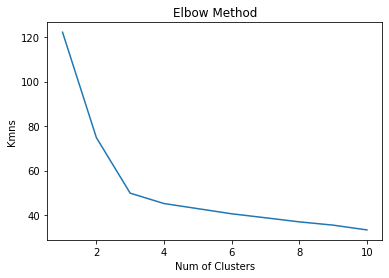

In [9]:
wcss =[]
for k in range(1,11):
    kmns =KMeans(n_clusters =k,random_state=0)
    kmns.fit(normalized_data)
    wcss.append(kmns.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Num of Clusters")
plt.ylabel("Kmns")
plt.show()

In [10]:
model1=KMeans(n_clusters=3,random_state=0)
model1.fit(normalized_data)
model1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [11]:
df['Clusters']=model1.labels_

In [12]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [13]:
model1.cluster_centers_

array([[0.98979592, 0.55832438, 0.5147213 , 0.57470261, 0.55869977,
        0.31543922, 0.24074595, 0.09661586, 0.60531382, 0.23755875,
        0.51734345, 0.16741331, 0.15392091, 0.24932312],
       [0.5       , 0.32295957, 0.23093888, 0.46981322, 0.4878231 ,
        0.26134216, 0.43883058, 0.36629365, 0.43833744, 0.38348649,
        0.15170401, 0.46808059, 0.55539629, 0.16749364],
       [0.00833333, 0.71109649, 0.25      , 0.58716578, 0.34295533,
        0.4009058 , 0.64408046, 0.55713783, 0.29937107, 0.4701367 ,
        0.35938567, 0.47655827, 0.69358974, 0.59595816]])

In [14]:
model1.inertia_

49.849181367996465

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clusters'>

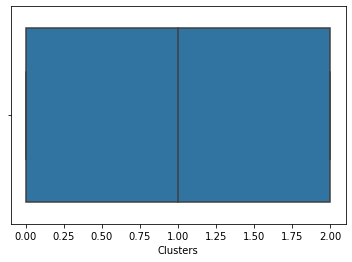

In [15]:
sns.boxplot(df['Clusters'])

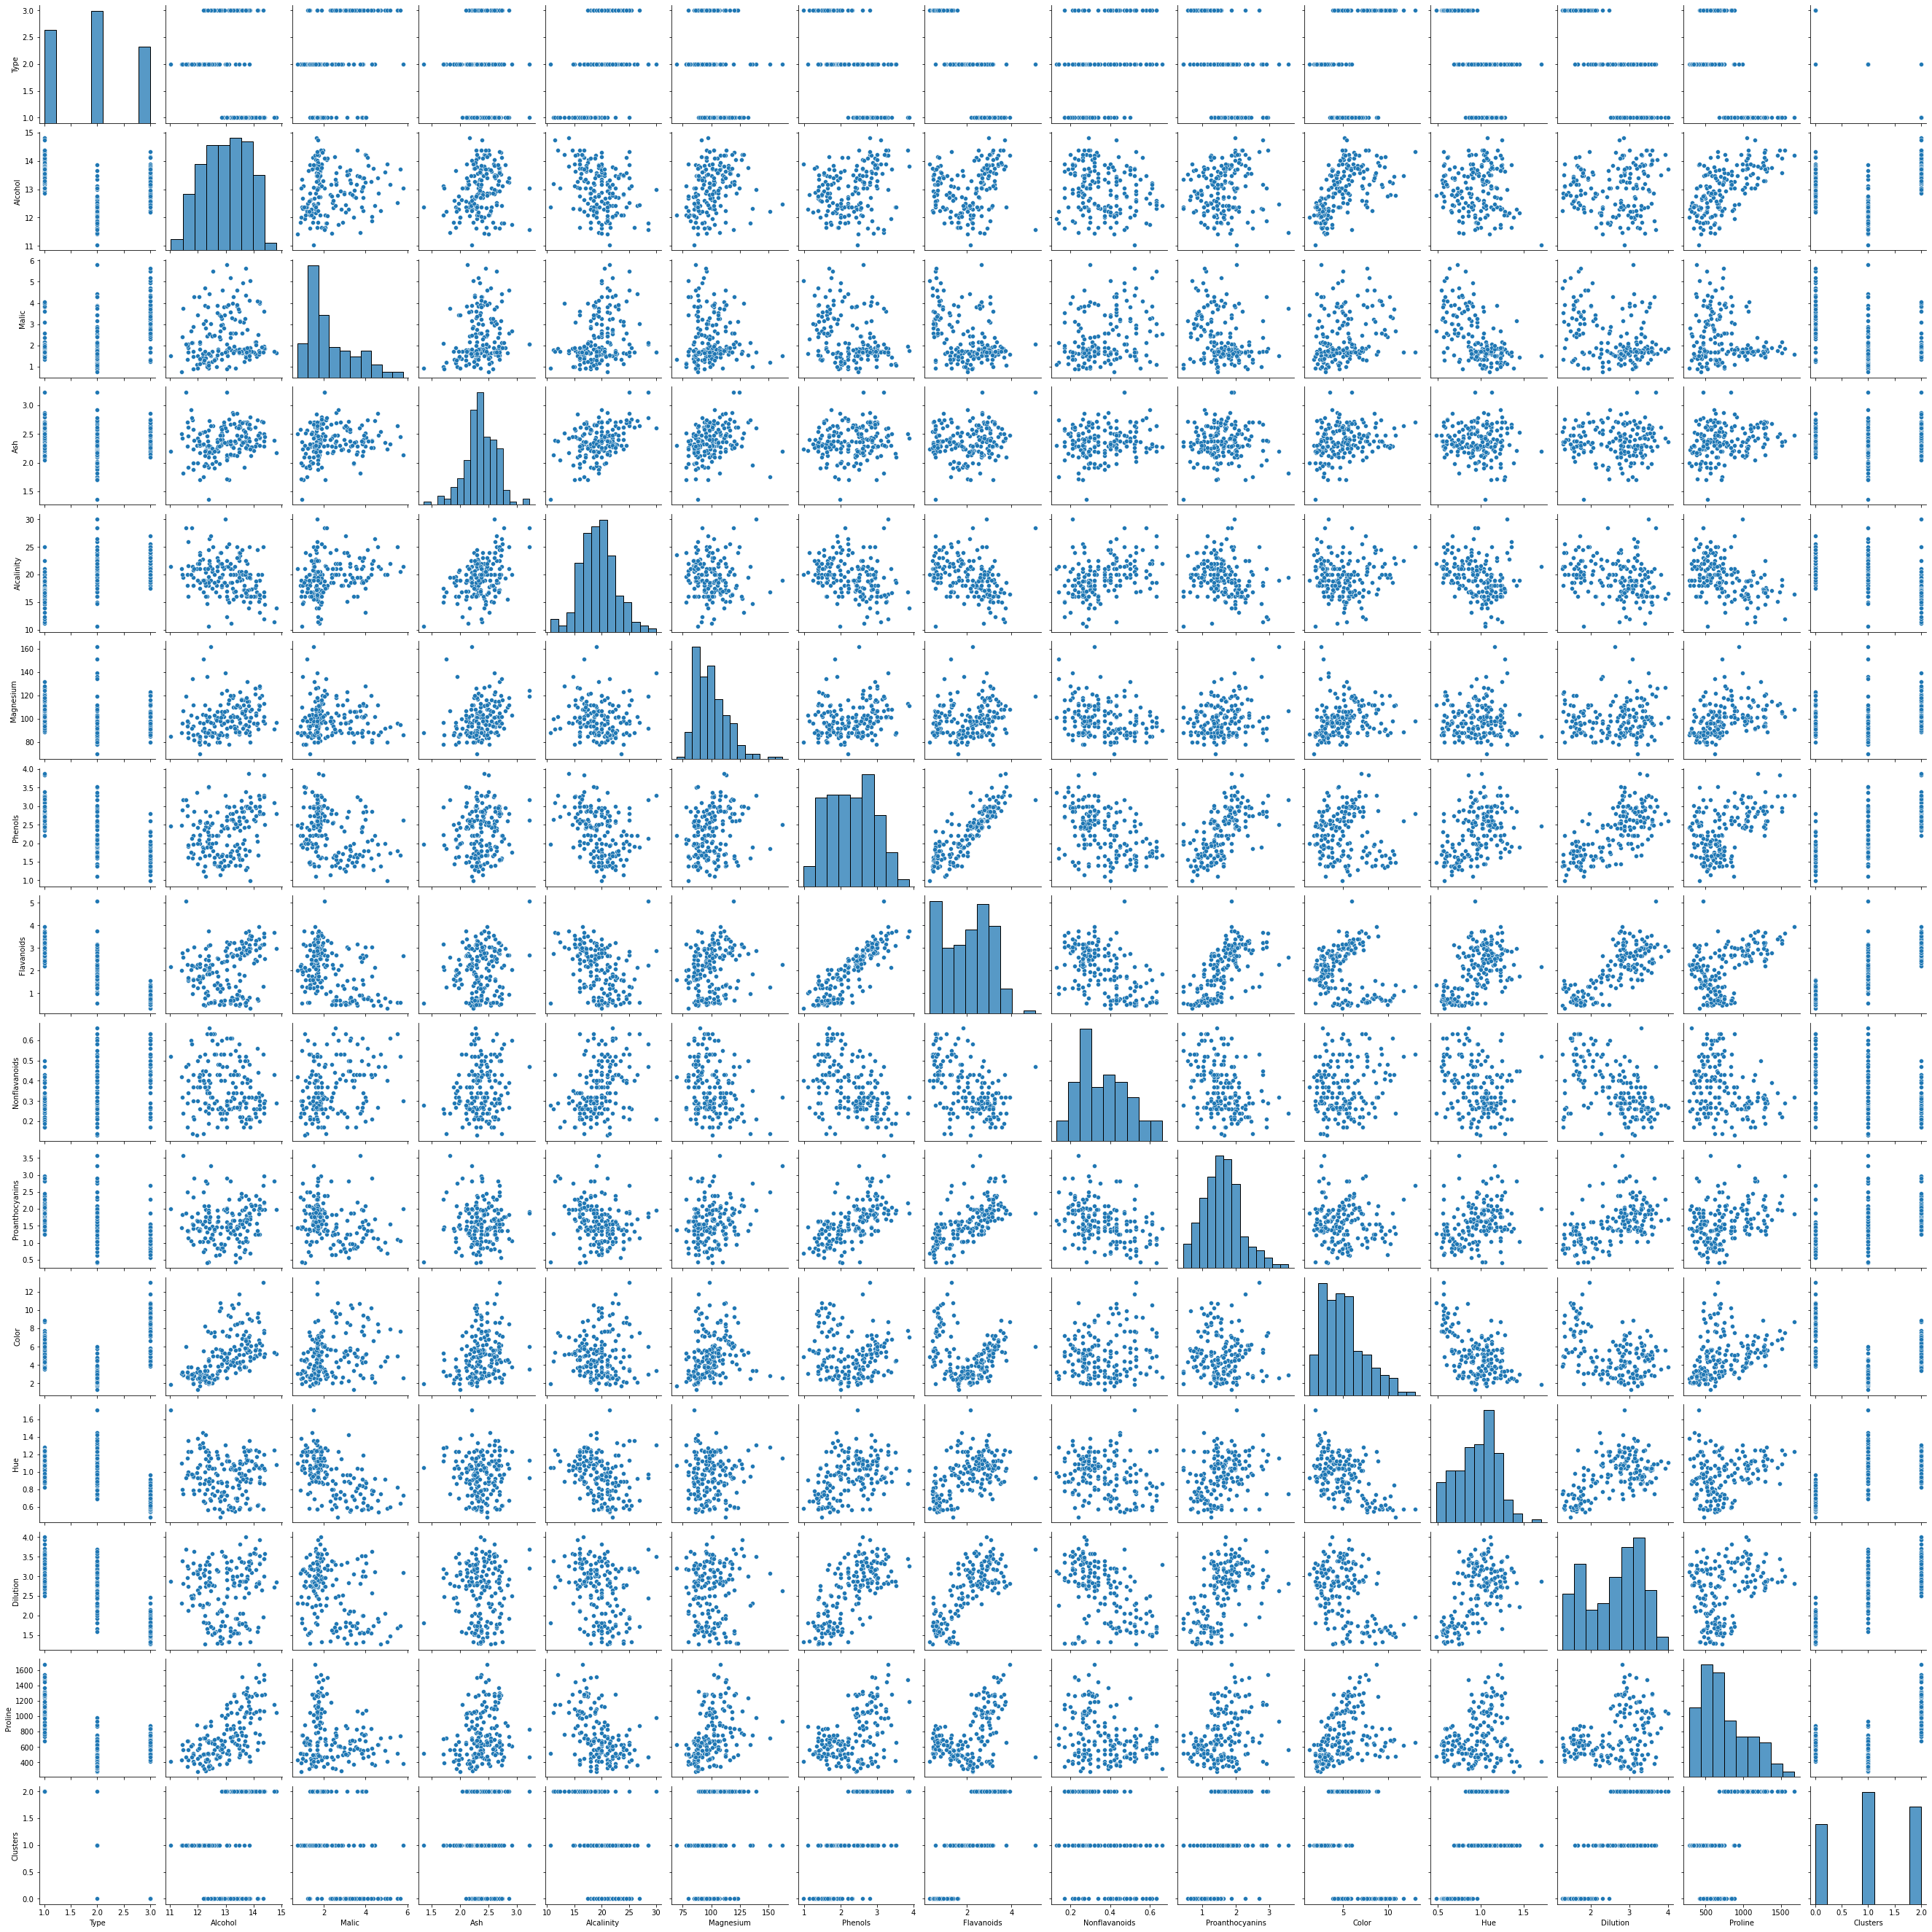

In [16]:
sns.pairplot(data=df)

Applying the PCA

In [17]:
from sklearn.decomposition import PCA


In [18]:
pca=PCA(n_components=3,random_state=None)
pca1 =pca.fit_transform(normalized_data)
data=pd.DataFrame(pca1)

In [19]:
pca1

array([[-8.47604157e-01, -2.43146319e-01,  2.97517320e-02],
       [-6.78650796e-01, -5.71173919e-03, -2.83969737e-01],
       [-7.00372235e-01, -1.83868071e-01,  1.97457120e-01],
       [-9.36075984e-01, -5.66966744e-01,  9.39186724e-02],
       [-4.54077045e-01, -6.33477143e-02,  2.86092048e-01],
       [-7.76939473e-01, -4.80602207e-01, -8.16766386e-02],
       [-7.28890640e-01, -2.95579430e-01, -1.12514825e-01],
       [-6.75292365e-01, -2.95566897e-01, -1.39489615e-02],
       [-6.90985736e-01, -3.03638910e-01, -2.34859068e-01],
       [-7.82069689e-01, -1.97958114e-01, -1.06020987e-01],
       [-8.65905159e-01, -3.45985665e-01, -4.57555248e-02],
       [-5.95351505e-01, -2.25308491e-01, -2.97683698e-01],
       [-6.51638553e-01, -2.29723700e-01, -1.78093164e-01],
       [-7.94438621e-01, -3.48487170e-01, -1.00092289e-01],
       [-9.52372705e-01, -5.24594574e-01, -1.11105793e-01],
       [-6.69525434e-01, -3.34299325e-01, -8.37164255e-02],
       [-6.33418157e-01, -4.48567906e-01

In [20]:
data=pd.DataFrame(data =pca1,columns=["Pca1","Pca2","Pca3"])
data

,Pca1,Pca2,Pca3
0,-0.847604,-0.243146,0.029752
1,-0.678651,-0.005712,-0.283970
2,-0.700372,-0.183868,0.197457
3,-0.936076,-0.566967,0.093919
4,-0.454077,-0.063348,0.286092
...,...,...,...
173,0.898916,-0.482112,0.203259
174,0.785427,-0.353231,0.088418
175,0.820658,-0.552469,-0.020750
176,0.777268,-0.430255,-0.095511


In [21]:
pca.explained_variance_ratio_

array([0.51003634, 0.14853339, 0.06702619])

In [22]:
var =np.cumsum(np.round(pca.explained_variance_ratio_,decimals =4)*100)
pd.DataFrame(var)

,0
0,51.00
1,65.85
2,72.55


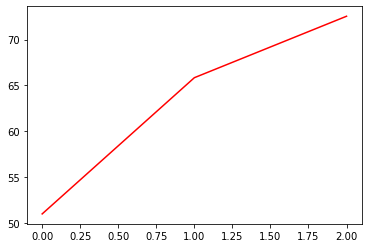

In [23]:
#plotting the PCA Curve
plt.plot(var,color="red")

This gets the 70% accuracte with the top 3 PCA
and Now perform again Clustering with the principal component analjysis data


C:\Users\RaviKiran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


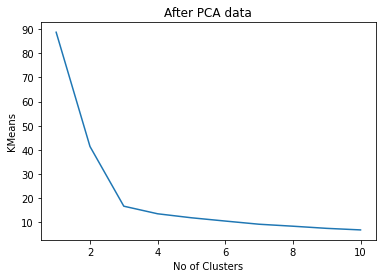

In [24]:
#pca data is already normalized so i was using that directly
import matplotlib.pyplot  as plt
%matplotlib inline
wcss=[]
for k  in range(1,11):
    krk=KMeans(n_clusters=k,random_state=None)
    krk.fit_transform(data)
    wcss.append(krk.inertia_)
plt.plot(range(1,11),wcss)
plt.title("After PCA data")
plt.xlabel("No of Clusters")
plt.ylabel("KMeans")
plt.show()


In [25]:
after_pca = KMeans(n_clusters=3,random_state=None)
after_pca_values= after_pca.fit(data)
after_pca_values.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [26]:
final_df =pd.DataFrame()
final_df['After_pca_Clusters'] =after_pca_values.labels_
final_df["Before_pca_Cluster"]= model1.labels_

In [27]:
final_df

,After_pca_Clusters,Before_pca_Cluster
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
173,1,0
174,1,0
175,1,0
176,1,0


In [28]:
final_df['After_pca_Clusters'].value_counts()

2    69
0    60
1    49
Name: After_pca_Clusters, dtype: int64

In [29]:
final_df["Before_pca_Cluster"].value_counts()

1    69
2    60
0    49
Name: Before_pca_Cluster, dtype: int64

by observing the above DataFrame After_pca_clusters and Before_pca_Clusters  are same but numbering is diffrent
let us visualise these Clusters

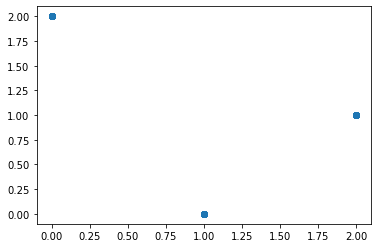

In [31]:
plt.scatter(x=final_df['After_pca_Clusters'],y=final_df["Before_pca_Cluster"])
plt.show()

<AxesSubplot:>

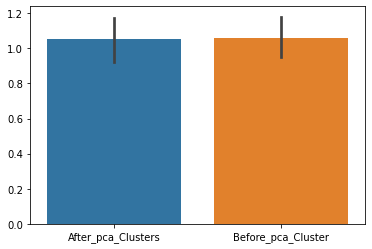

In [32]:
import seaborn as sns
sns.barplot(data=final_df)